In [1]:
import pyautogui
import time
import webbrowser
import pandas as pd
import bs4
import pyperclip
import numpy as np
import os
import re
import math
from datetime import datetime, timedelta


from urllib.parse import urlparse
#%% Windows simulation
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.actions.action_builder import ActionBuilder
from selenium.common.exceptions import NoSuchElementException



In [48]:
df_venture = pd.read_csv('../Data/ico_manully.csv')
df_venture

,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,Ended,When,...,ICO Order,Social,Funds and Investors,Investor Count,ICO Start,ICO End,Soft Cap,Hard Cap,ICO Raised,Other Link
0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,2023/10/30,2022/10/11,...,1,"{'Website': 'https://artyfact.game/', 'X (Ex-T...",NaN,0,2023/8/1,2023/10/30,660000.0,1320000.0,1320000,https://foundico.com/ico/artyfact.html
1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,2023/10/26,2023/10/25,...,1,"{'Website': 'https://supraoracles.com/', 'X (E...","['Coinbase Ventures', 'HashKey Capital', 'Anim...",22,2023/10/25,2023/10/26,NaN,2400000.0,2400000,https://common.fund/projects/supra-public-sale
2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,2023/10/9,2023/9/12,...,1,"{'Website': 'https://islamiccoin.net/', 'X (Ex...",NaN,0,2023/9/12,2023/10/9,NaN,4300000.0,2399474,NaN
3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,2023/9/27,2023/6/15,...,1,"['https://archway.io/', 'https://twitter.com/a...","['Blockchain Capital', 'Hashed Fund\nLead', 'C...",12,2023/6/15,2023/6/23,6000000.0,27000000.0,27000000,NaN
4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,2023/9/10,2023/8/28,...,2,{'Website': 'https://scapesmania.io/?utm_sourc...,NaN,0,2023/8/28,2023/9/10,NaN,720000.0,720000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,NaN,NaN,...,1,"{'Website': 'https://waves.tech/', 'X (Ex-Twit...",NaN,0,2016/4/11,2016/5/30,NaN,16000000.0,16000000,NaN
790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,NaN,NaN,...,1,"{'Website': 'https://www.wetrust.io/', 'X (Ex-...",NaN,0,NaN,NaN,NaN,NaN,0,NaN
791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,NaN,NaN,...,1,"['http://www.zengold.org/', 'https://zengold.o...",NaN,0,NaN,NaN,NaN,NaN,0,NaN
792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,NaN,NaN,...,1,"['http://zipper.io/', 'https://twitter.com/Zip...",NaN,0,NaN,NaN,NaN,NaN,0,NaN


In [49]:
df_venture['Success'] = df_venture['ICO Raised']>0
num = len(df_venture['ICO Raised'])
num_success = sum(df_venture['Success'])
num_nonsucc = sum(df_venture['ICO Raised']==0)

print(f'Total num: {num}; Success:{num_success}; Non-Success:{num_nonsucc}.')

num_soft = sum(~df_venture['Soft Cap'].isnull())
num_hard = sum(~df_venture['Hard Cap'].isnull())
num_reach = sum(df_venture['Hard Cap']<=df_venture['ICO Raised'])

print(f'Soft cap: {num_soft}, Hard cap: {num_hard}.Reach :{num_reach}')

Total num: 794; Success:579; Non-Success:215.
Soft cap: 24, Hard cap: 547.Reach :413


In [50]:
def date_clean(date_str):
     date_str = str(date_str)
     if len(date_str) == 0:
        return None
     try:
          
          return datetime.strptime(date_str, "%Y/%m/%d")
     except ValueError:
          
          return None
     
df_venture['ICO End'] = df_venture['ICO End'].apply(date_clean)
df_venture['ICO Start'] = df_venture['ICO Start'].apply(date_clean)
df_venture

,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,Ended,When,...,Social,Funds and Investors,Investor Count,ICO Start,ICO End,Soft Cap,Hard Cap,ICO Raised,Other Link,Success
0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,2023/10/30,2022/10/11,...,"{'Website': 'https://artyfact.game/', 'X (Ex-T...",NaN,0,2023-08-01,2023-10-30,660000.0,1320000.0,1320000,https://foundico.com/ico/artyfact.html,True
1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,2023/10/26,2023/10/25,...,"{'Website': 'https://supraoracles.com/', 'X (E...","['Coinbase Ventures', 'HashKey Capital', 'Anim...",22,2023-10-25,2023-10-26,NaN,2400000.0,2400000,https://common.fund/projects/supra-public-sale,True
2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,2023/10/9,2023/9/12,...,"{'Website': 'https://islamiccoin.net/', 'X (Ex...",NaN,0,2023-09-12,2023-10-09,NaN,4300000.0,2399474,NaN,True
3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,2023/9/27,2023/6/15,...,"['https://archway.io/', 'https://twitter.com/a...","['Blockchain Capital', 'Hashed Fund\nLead', 'C...",12,2023-06-15,2023-06-23,6000000.0,27000000.0,27000000,NaN,True
4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,2023/9/10,2023/8/28,...,{'Website': 'https://scapesmania.io/?utm_sourc...,NaN,0,2023-08-28,2023-09-10,NaN,720000.0,720000,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,NaN,NaN,...,"{'Website': 'https://waves.tech/', 'X (Ex-Twit...",NaN,0,2016-04-11,2016-05-30,NaN,16000000.0,16000000,NaN,True
790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,NaN,NaN,...,"{'Website': 'https://www.wetrust.io/', 'X (Ex-...",NaN,0,NaT,NaT,NaN,NaN,0,NaN,False
791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,NaN,NaN,...,"['http://www.zengold.org/', 'https://zengold.o...",NaN,0,NaT,NaT,NaN,NaN,0,NaN,False
792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,NaN,NaN,...,"['http://zipper.io/', 'https://twitter.com/Zip...",NaN,0,NaT,NaT,NaN,NaN,0,NaN,False


In [51]:
df_venture['ICO Days'] = df_venture['ICO End']-df_venture['ICO Start']+ timedelta(days=1)
col_name = df_venture.columns.tolist()[1:]
for c in col_name:
     n = sum(~df_venture[c].isnull())
     print(f"Label:{c},number:#{n}")


Label:Project,number:#794
Label:Abbr,number:#794
Label:Link,number:#794
Label:Sale Price,number:#781
Label:ROI,number:#748
Label:Total Raise,number:#581
Label:Launchpad,number:#104
Label:Ended,number:#599
Label:When,number:#599
Label:Funds,number:#257
Label:Type,number:#794
Label:Raise,number:#571
Label:Initial Cap,number:#119
Label:Market Cap,number:#707
Label:Blockchain,number:#674
Label:Category,number:#544
Label:Listing Date,number:#761
Label:ATH ROI,number:#748
Label:ICO Days,number:#715
Label:Rounds,number:#794
Label:ICO Order,number:#794
Label:Social,number:#794
Label:Funds and Investors,number:#257
Label:Investor Count,number:#794
Label:ICO Start,number:#715
Label:ICO End,number:#715
Label:Soft Cap,number:#24
Label:Hard Cap,number:#547
Label:ICO Raised,number:#794
Label:Other Link,number:#2
Label:Success,number:#794


In [52]:
df_investor = pd.read_csv('../Data/venture_table.csv')
df_investor

,Unnamed: 0,Name,Link,Tier,Type,Location,Portfolio,# Investments
0,0,Coinbase Ventures,https://cryptorank.io/funds/coinbase-ventures,1.0,Venture,United States,FTX TokenYuga LabsAmber Group,340
1,1,Andreessen Horowitz (a16z),https://cryptorank.io/funds/andreessen-horowitz,1.0,Venture,United States,RobinhoodForteCross River,210
2,2,Pantera Capital,https://cryptorank.io/funds/pantera-capital,1.0,Venture,United States,AlchemyBakktAmber Group,179
3,3,Polychain Capital,https://cryptorank.io/funds/polychain-capital,1.0,Venture,United States,SolanaCoinbaseCoinDCX,177
4,4,HashKey Capital,https://cryptorank.io/funds/hash-key-capital,1.0,Venture,Hong Kong,Secret NetworkCoinlistAssembly,165
...,...,...,...,...,...,...,...,...
8910,8910,Zett.eth,https://cryptorank.io/funds/zett-eth,NaN,Angel Investor,Sweden,DoinGud,1
8911,8911,Zhixian,https://cryptorank.io/funds/zhixian,NaN,Angel Investor,NaN,DeSchool,1
8912,8912,Zhu Deming,https://cryptorank.io/funds/zhudeming,NaN,Angel Investor,NaN,Rivermen,1
8913,8913,ZLOY,https://cryptorank.io/funds/zloy,NaN,Angel Investor,NaN,RareRound,1


In [53]:

col_name = df_investor.columns.tolist()[1:]
for c in col_name:
     n = sum(~df_investor[c].isnull())
     print(f"Label:{c},number:#{n}")

Label:Name,number:#8915
Label:Link,number:#8915
Label:Tier,number:#5434
Label:Type,number:#8915
Label:Location,number:#5794
Label:Portfolio,number:#8915
Label:# Investments,number:#8915


In [83]:
import ast
def github_find(txt):
     if txt[0]=='{':
          link_dict = ast.literal_eval(txt)
          #print(link_dict)
          github = link_dict.get('GitHub')
     else:
          for t in ast.literal_eval(txt):
               if 'github'in t:
                    github = t
               else:
                    github = None
     return github
          

In [100]:
from collections import Counter
df_venture['github'] = df_venture['Social'].apply(github_find)
df_venture['code_available'] = ~df_venture['github'].isnull()

num_code = sum(df_venture['code_available'])
num_code_none = sum(df_venture['code_available']==0)

print(f'Code available:{num_code}; Non-available:{num_code_none}.')
print(f"ICO Order: {Counter(df_venture['ICO Order'])}")
print(f"Category: {Counter(df_venture['Category'])}")
df_venture['is_Ethereum'] = df_venture['Blockchain'].str.contains('Ethereum')

print(f"Ehthereum: {sum(df_venture['is_Ethereum'].dropna())}, Other:{sum((df_venture['is_Ethereum']==0).dropna())}")
df_venture

Code available:479; Non-available:315.
ICO Order: Counter({1: 728, 2: 39, 3: 16, 4: 9, 5: 1, 7: 1})
Category: Counter({nan: 250, 'Blockchain Service': 175, 'DeFi': 88, 'Chain': 78, 'Blockchain Infrastructure': 73, 'GameFi': 39, 'CeFi': 32, 'Social': 31, 'Currency': 21, 'NFT': 7})
Ehthereum: 541, Other:133


,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,Ended,When,...,ICO Start,ICO End,Soft Cap,Hard Cap,ICO Raised,Other Link,Success,github,code_available,is_Ethereum
0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,2023/10/30,2022/10/11,...,2023-08-01,2023-10-30,660000.0,1320000.0,1320000,https://foundico.com/ico/artyfact.html,True,None,False,False
1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,2023/10/26,2023/10/25,...,2023-10-25,2023-10-26,NaN,2400000.0,2400000,https://common.fund/projects/supra-public-sale,True,None,False,NaN
2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,2023/10/9,2023/9/12,...,2023-09-12,2023-10-09,NaN,4300000.0,2399474,NaN,True,None,False,NaN
3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,2023/9/27,2023/6/15,...,2023-06-15,2023-06-23,6000000.0,27000000.0,27000000,NaN,True,https://github.com/archway-network,True,NaN
4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,2023/9/10,2023/8/28,...,2023-08-28,2023-09-10,NaN,720000.0,720000,NaN,True,None,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,NaN,NaN,...,2016-04-11,2016-05-30,NaN,16000000.0,16000000,NaN,True,https://github.com/wavesplatform/,True,True
790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,0,NaN,False,https://github.com/WeTrustPlatform,True,True
791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,0,NaN,False,None,False,False
792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,0,NaN,False,None,False,True


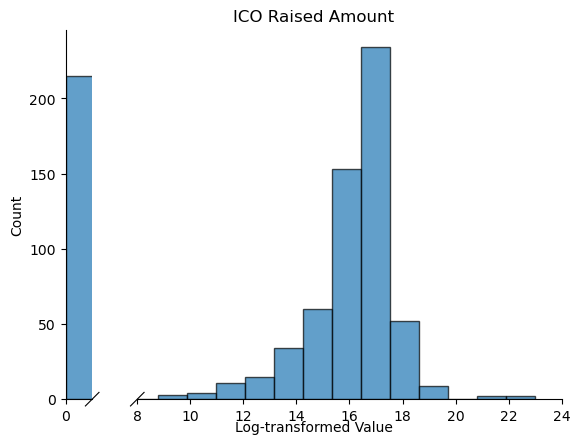

In [133]:

    
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# 创建直方图
bax = brokenaxes(xlims=((0, 1), (8, 24)), hspace=0.05)
data = np.log(1 + df_venture['ICO Raised'])
bins = np.linspace(data.min(), data.max(), 22)
bax.hist(data, bins=bins, edgecolor='black', alpha=0.7)

# 添加标签和标题
bax.set_xlabel('Log-transformed Value')
bax.set_ylabel('Count')
bax.set_title('ICO Raised Amount')

# 设置刻度
#plt.set_xticks([0, 1, 8, 24])

# 显示图形
plt.show()

3.999991999914312e-06 4.060443010546419


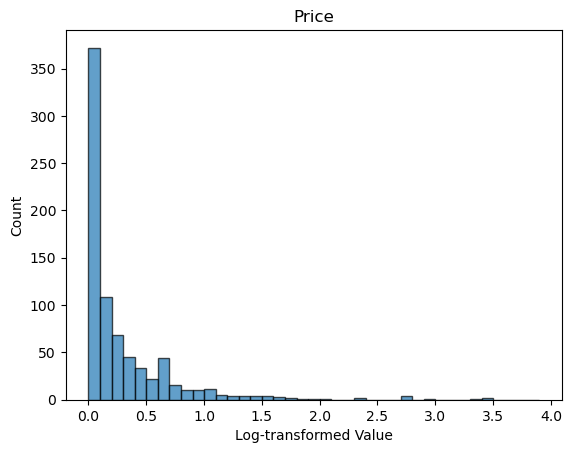

In [149]:

bins = [i/10 for i in range(0,40,1)]

data = np.log(1+df_venture['Sale Price'])
print(min(data),max(data))
# 创建直方图
plt.hist(data, bins=bins, edgecolor='black',alpha= 0.7)


# 添加标签和标题
plt.xlabel('Log-transformed Value')
plt.ylabel('Count')
plt.title('Price')

# 显示图形
plt.show()

TypeError: float() argument must be a string or a real number, not 'Counter'

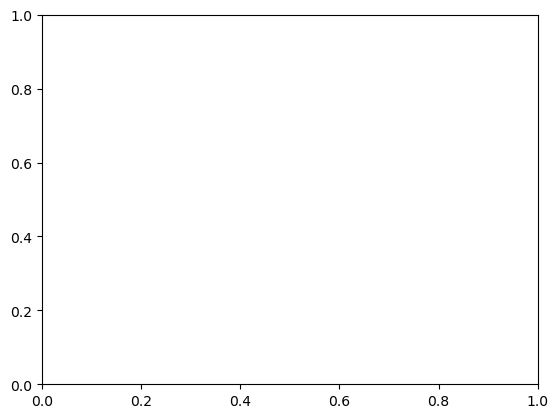

In [160]:
year_list = [day.year for day in df_venture['ICO Start'].tolist()]
Counter(year_list)
plt.plot(Counter(year_list))